In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import math
import keras
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.interpolate import griddata

# **Load Measures**

## **Generate test coordinates**

In [3]:
def get_test_coors(test_coors_x, test_coors_y):
    test_coors_z = []
    for x, y in zip(test_coors_x, test_coors_y):
        if y >= 330 and x >= 70 and x <= 210:
            test_coors_z.append(75)
        else:
            test_coors_z.append(0)
    test_coors = [(x, y, z) for x, y, z in zip(test_coors_x, test_coors_y, test_coors_z)]
    return test_coors

In [4]:
def get_cords():
    # Define the field dimensions in centimeters
    field_width = 280  # in cm
    field_height = 400  # in cm

    # Define the point spacing in centimeters
    point_spacing = 20  # in cm

    # Define the table's properties
    table_z = 75  # height of the table in cm
    table_x_min = 70  # x coordinate of the left edge of the table
    table_x_max = 210  # x coordinate of the right edge of the table
    table_y_min = 330  # y coordinate of the top edge of the table
    table_y_max = 400  # y coordinate of the bottom edge of the table

    # Calculate the number of points along each axis
    num_points_x = field_width // point_spacing + 1
    num_points_y = field_height // point_spacing + 1

    # Generate the points
    points = []
    index = 0

    for y in range(int(num_points_y)):
        for x in range(int(num_points_x)):
            point_x = x * point_spacing
            point_y = y * point_spacing

            # Check if the point is within the table's footprint
            if table_x_min <= point_x <= table_x_max and table_y_min <= point_y <= table_y_max:
                point_z = table_z  # Points on the table have z-coordinate 75
            else:
                point_z = 0  # Points on the ground have z-coordinate 0

            points.append({str(index): (point_x, point_y, point_z)})
            index += 1
    return points

In [5]:
# determine test
test_coors_x = [0, 200, 100, 280, 40, 160, 80, 220, 20, 160, 120, 260, 60, 240, 180, 100, 280, 40, 260, 80, 220, 0, 140, 180, 20]
test_coors_y = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 340, 360, 380, 400]
test_coors = get_test_coors(test_coors_x, test_coors_y)
# determine train
tot_coords = get_cords()
coordinates = [list(cor.values())[0] for cor in tot_coords]
train_coors = [cor for cor in coordinates if cor not in test_coors]

In [6]:
print('Number of Train coords:', len(train_coors))
print('Number of Test coords:', len(test_coors))

Number of Train coords: 290
Number of Test coords: 25


## **Load Predictions**

In [7]:
# load predictions
path = '/content/drive/MyDrive/Taarlab/Classical/Main/3kinects/Raw Samples'
with open(path + '/k2&3_predictions_test.pkl', 'rb') as f:
    preds_test = pickle.load(f)
with open(path + '/k2&3_predictions_train.pkl', 'rb') as f:
    preds_train = pickle.load(f)

In [8]:
print(preds_train)
print(len(preds_train))
print(preds_test)
print(len(preds_test))

[(21, 0, 0), (26, 54, 0), (52, 0, 0), (0, 6, 0), (41, 171, 0), (0, 86, 0), (3, 25, 0), (130, 0, 0), (198, 0, 0), (248, 0, 0), (227, 0, 0), (257, 0, 0), (264, 0, 0), (277, 0, 0), (24, 10, 0), (49, 9, 0), (53, 24, 0), (77, 15, 0), (101, 9, 0), (120, 9, 0), (140, 12, 0), (158, 16, 0), (179, 16, 0), (184, 2, 0), (223, 31, 0), (250, 24, 0), (252, 12, 0), (282, 0, 0), (0, 44, 0), (0, 55, 0), (42, 48, 0), (64, 48, 0), (81, 48, 0), (116, 52, 0), (144, 44, 0), (154, 55, 0), (181, 48, 0), (200, 48, 0), (224, 47, 0), (248, 47, 0), (282, 39, 0), (282, 52, 0), (0, 61, 0), (7, 70, 0), (41, 70, 0), (52, 77, 0), (82, 68, 0), (103, 70, 0), (121, 69, 0), (139, 70, 0), (159, 69, 0), (264, 122, 0), (198, 69, 0), (218, 68, 0), (243, 68, 0), (278, 61, 0), (0, 75, 0), (10, 85, 0), (62, 85, 0), (87, 81, 0), (103, 83, 0), (130, 79, 0), (142, 83, 0), (160, 86, 0), (179, 87, 0), (197, 88, 0), (214, 87, 0), (240, 90, 0), (270, 86, 0), (277, 53, 0), (69, 30, 0), (277, 205, 0), (82, 41, 0), (97, 64, 0), (88, 87, 0)

In [9]:
print(coordinates)
print(len(test_coors), test_coors)
print(len(train_coors), train_coors)

[(0, 0, 0), (20, 0, 0), (40, 0, 0), (60, 0, 0), (80, 0, 0), (100, 0, 0), (120, 0, 0), (140, 0, 0), (160, 0, 0), (180, 0, 0), (200, 0, 0), (220, 0, 0), (240, 0, 0), (260, 0, 0), (280, 0, 0), (0, 20, 0), (20, 20, 0), (40, 20, 0), (60, 20, 0), (80, 20, 0), (100, 20, 0), (120, 20, 0), (140, 20, 0), (160, 20, 0), (180, 20, 0), (200, 20, 0), (220, 20, 0), (240, 20, 0), (260, 20, 0), (280, 20, 0), (0, 40, 0), (20, 40, 0), (40, 40, 0), (60, 40, 0), (80, 40, 0), (100, 40, 0), (120, 40, 0), (140, 40, 0), (160, 40, 0), (180, 40, 0), (200, 40, 0), (220, 40, 0), (240, 40, 0), (260, 40, 0), (280, 40, 0), (0, 60, 0), (20, 60, 0), (40, 60, 0), (60, 60, 0), (80, 60, 0), (100, 60, 0), (120, 60, 0), (140, 60, 0), (160, 60, 0), (180, 60, 0), (200, 60, 0), (220, 60, 0), (240, 60, 0), (260, 60, 0), (280, 60, 0), (0, 80, 0), (20, 80, 0), (40, 80, 0), (60, 80, 0), (80, 80, 0), (100, 80, 0), (120, 80, 0), (140, 80, 0), (160, 80, 0), (180, 80, 0), (200, 80, 0), (220, 80, 0), (240, 80, 0), (260, 80, 0), (280, 80

In [10]:
# gather predictions
train_indexes = [coordinates.index(cor) for cor in train_coors]
test_indexes = [coordinates.index(cor) for cor in test_coors]

# create and fill out dictionary
preds_dict = {}
for label in coordinates:
    preds_dict[label] = []
    if label in train_coors:
        index = train_coors.index(label)
        preds_dict[label].append(preds_train[index])
    else:
        index = test_coors.index(label)
        preds_dict[label].append(preds_test[index])

print(preds_dict)

{(0, 0, 0): [(35, 0, 0)], (20, 0, 0): [(21, 0, 0)], (40, 0, 0): [(26, 54, 0)], (60, 0, 0): [(52, 0, 0)], (80, 0, 0): [(0, 6, 0)], (100, 0, 0): [(41, 171, 0)], (120, 0, 0): [(0, 86, 0)], (140, 0, 0): [(3, 25, 0)], (160, 0, 0): [(130, 0, 0)], (180, 0, 0): [(198, 0, 0)], (200, 0, 0): [(248, 0, 0)], (220, 0, 0): [(227, 0, 0)], (240, 0, 0): [(257, 0, 0)], (260, 0, 0): [(264, 0, 0)], (280, 0, 0): [(277, 0, 0)], (0, 20, 0): [(24, 10, 0)], (20, 20, 0): [(49, 9, 0)], (40, 20, 0): [(53, 24, 0)], (60, 20, 0): [(77, 15, 0)], (80, 20, 0): [(101, 9, 0)], (100, 20, 0): [(120, 9, 0)], (120, 20, 0): [(140, 12, 0)], (140, 20, 0): [(158, 16, 0)], (160, 20, 0): [(179, 16, 0)], (180, 20, 0): [(184, 2, 0)], (200, 20, 0): [(201, 30, 0)], (220, 20, 0): [(223, 31, 0)], (240, 20, 0): [(250, 24, 0)], (260, 20, 0): [(252, 12, 0)], (280, 20, 0): [(282, 0, 0)], (0, 40, 0): [(0, 44, 0)], (20, 40, 0): [(0, 55, 0)], (40, 40, 0): [(42, 48, 0)], (60, 40, 0): [(64, 48, 0)], (80, 40, 0): [(81, 48, 0)], (100, 40, 0): [(98,

## **Load TDOAs**

In [11]:
# load predictions
path = '/content/drive/MyDrive/Taarlab/Classical/Main/3kinects/Raw Samples'
with open(path + '/actual_tdoa.pkl', 'rb') as f:
    actual_tdoas = pickle.load(f)
with open(path + '/denoised_tdoa_df_int20.pkl', 'rb') as f:
    measured_tdoas = pickle.load(f)

In [12]:
print(actual_tdoas)
print(actual_tdoas.shape)
print(measured_tdoas)
print(measured_tdoas.shape)

     tdoa01_k1  tdoa02_k1  tdoa03_k1  tdoa12_k1  tdoa13_k1  tdoa23_k1  \
0     0.000434   0.000551   0.000659   0.000117   0.000224   0.000108   
1     0.000434   0.000551   0.000659   0.000117   0.000224   0.000108   
2     0.000434   0.000551   0.000659   0.000117   0.000224   0.000108   
3     0.000434   0.000551   0.000659   0.000117   0.000224   0.000108   
4     0.000434   0.000551   0.000659   0.000117   0.000224   0.000108   
..         ...        ...        ...        ...        ...        ...   
310  -0.000058  -0.000077  -0.000094  -0.000018  -0.000036  -0.000018   
311  -0.000080  -0.000104  -0.000128  -0.000024  -0.000047  -0.000023   
312  -0.000101  -0.000130  -0.000158  -0.000030  -0.000058  -0.000028   
313  -0.000120  -0.000155  -0.000188  -0.000035  -0.000068  -0.000033   
314  -0.000139  -0.000179  -0.000216  -0.000040  -0.000077  -0.000038   

     tdoa01_k2  tdoa02_k2  tdoa03_k2  tdoa12_k2  tdoa13_k2  tdoa23_k2  \
0     0.000249   0.000313   0.000372   0.000065   

In [13]:
# gather tdoas' errors for each label
labels = actual_tdoas['label'].to_list()
tdoa_er_dict = {}
for i in range(len(labels)):
    acts = actual_tdoas.iloc[i][6:-1].to_numpy()
    measured = measured_tdoas.iloc[i][6:-1].to_numpy()
    tdoa_er_dict[labels[i]] = abs(np.sum(acts - measured))

print(tdoa_er_dict)

{(0, 0, 0): 0.0004376510753064968, (20, 0, 0): 0.0004084748064278618, (40, 0, 0): 0.0005718332994011762, (60, 0, 0): 0.0014607567053257044, (80, 0, 0): 9.29187216144855e-05, (100, 0, 0): 0.0011085872713041385, (120, 0, 0): 1.9630116628842814e-05, (140, 0, 0): 0.00040034477472108737, (160, 0, 0): 6.282433896001436e-06, (180, 0, 0): 0.00017888471119828568, (200, 0, 0): 3.712488647112882e-05, (220, 0, 0): 0.0001284824951884777, (240, 0, 0): 0.0002721340680171201, (260, 0, 0): 0.00012418823833984787, (280, 0, 0): 0.00011167433689372102, (0, 20, 0): 0.0001648894300899104, (20, 20, 0): 0.00010478194817192671, (40, 20, 0): 5.817584568471997e-05, (60, 20, 0): 0.0001549479224750587, (80, 20, 0): 4.594103054019327e-05, (100, 20, 0): 0.0005097274594379543, (120, 20, 0): 1.9564715536649508e-05, (140, 20, 0): 5.0640730174010234e-05, (160, 20, 0): 0.0006544002129739634, (180, 20, 0): 0.0002818967364959083, (200, 20, 0): 6.687691527376523e-05, (220, 20, 0): 5.803520240948656e-05, (240, 20, 0): 0.0002

# **Calculate and Plot Errors**

## **Calculate Errors**

In [14]:
# pred error
for label in preds_dict.keys():
    x, y, z = label
    x_pred, y_pred, z_pred = preds_dict[label][0]
    error = math.sqrt((x - x_pred)**2 + (y - y_pred)**2 + (z - z_pred)**2)
    preds_dict[label].append(error)

print(preds_dict)

{(0, 0, 0): [(35, 0, 0), 35.0], (20, 0, 0): [(21, 0, 0), 1.0], (40, 0, 0): [(26, 54, 0), 55.78530272392541], (60, 0, 0): [(52, 0, 0), 8.0], (80, 0, 0): [(0, 6, 0), 80.22468448052632], (100, 0, 0): [(41, 171, 0), 180.89223311131963], (120, 0, 0): [(0, 86, 0), 147.63468427168462], (140, 0, 0): [(3, 25, 0), 139.26234236145822], (160, 0, 0): [(130, 0, 0), 30.0], (180, 0, 0): [(198, 0, 0), 18.0], (200, 0, 0): [(248, 0, 0), 48.0], (220, 0, 0): [(227, 0, 0), 7.0], (240, 0, 0): [(257, 0, 0), 17.0], (260, 0, 0): [(264, 0, 0), 4.0], (280, 0, 0): [(277, 0, 0), 3.0], (0, 20, 0): [(24, 10, 0), 26.0], (20, 20, 0): [(49, 9, 0), 31.016124838541646], (40, 20, 0): [(53, 24, 0), 13.601470508735444], (60, 20, 0): [(77, 15, 0), 17.72004514666935], (80, 20, 0): [(101, 9, 0), 23.706539182259394], (100, 20, 0): [(120, 9, 0), 22.825424421026653], (120, 20, 0): [(140, 12, 0), 21.540659228538015], (140, 20, 0): [(158, 16, 0), 18.439088914585774], (160, 20, 0): [(179, 16, 0), 19.4164878389476], (180, 20, 0): [(18

## **Plot Errors**

### **Functions**

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

k1_info = {
    'positions': [
        (152.3, 0, 0),
        (137.4, 0, 0),
        (133.4, 0, 0),
        (129.7, 0, 0)
    ],
    'middle': [141, 0, 0],
    'folder_path': '/content/drive/MyDrive/Taarlab/Classical/Main/3kinects/Raw Samples/k1'
}

k2_info = {
    'positions': [
        [282, 211.3, 75],
        [282, 196.4, 75],
        [282, 192.4, 75],
        [282, 188.7, 75]
    ],
    'middle': [282, 200, 75],
    'folder_path': '/content/drive/MyDrive/Taarlab/Classical/Main/3kinects/Raw Samples/k2'
}

k3_info = {
    'positions': [
        (0, 188.7, 75),
        (0, 203.6, 75),
        (0, 207.6, 75),
        (0, 211.3, 75)
    ],
    'middle': [0, 200, 75],
    'folder_path': '/content/drive/MyDrive/Taarlab/Classical/Main/3kinects/Raw Samples/k3'
}

k1_mic_pos = k1_info['positions']
k2_mic_pos = k2_info['positions']
k3_mic_pos = k3_info['positions']

# Environment traits
mins = (0, 0, 0)
maxs = (282, 400, 75)
grid_resolution = 1
table_start = 330
table_end = 400

# Microphone positions in 3D
mics_k1 = k1_mic_pos
mics_k2 = k2_mic_pos
mics_k3 = k3_mic_pos

microphone_xs_k1 = [sublist[0] for sublist in mics_k1]
microphone_ys_k1 = [sublist[1] for sublist in mics_k1]
microphone_zs_k1 = [sublist[2] for sublist in mics_k1]
microphone_xs_k2 = [sublist[0] for sublist in mics_k2]
microphone_ys_k2 = [sublist[1] for sublist in mics_k2]
microphone_zs_k2 = [sublist[2] for sublist in mics_k2]
microphone_xs_k3 = [sublist[0] for sublist in mics_k3]
microphone_ys_k3 = [sublist[1] for sublist in mics_k3]
microphone_zs_k3 = [sublist[2] for sublist in mics_k3]

# Extract margins
x_min, y_min, z_min = mins
x_max, y_max, z_max = maxs
table_y_min = 330
table_y_max = 400
table_x_min = 70
table_x_max = 210
table_z = 75

def plot_error_poles(positions, errors, num_of_mics=3, k1=True, k2=True, k3=True):
    # kinect existence
    k_exs = [k1, k2, k3]

    # mic positions
    mic_xs = (microphone_xs_k1, microphone_xs_k2, microphone_xs_k3)
    mic_ys = (microphone_ys_k1, microphone_ys_k2, microphone_ys_k3)
    mic_zs = (microphone_zs_k1, microphone_zs_k2, microphone_zs_k3)

    # Create a 3D plot
    fig = plt.figure(figsize=(15, 9))
    ax = fig.add_subplot(111, projection='3d')

    # Unpack the positions for plotting
    actual_x, actual_y, actual_z = zip(*positions)

    # Plot the actual points (in red)
    ax.scatter(actual_x, actual_y, actual_z, c='r', marker='o', label='Positions')

    # Plot poles representing the errors at each position
    for i in range(len(positions)):
        # Pole from the actual point going upwards by the error value
        ax.plot([actual_x[i], actual_x[i]], [actual_y[i], actual_y[i]], [actual_z[i], actual_z[i] + errors[i]],
                color='orange', linewidth=2, label='Error' if i == 0 else "")

    # Plot microphone points
    for i in range(num_of_mics):
        if k_exs[i]:
            ax.scatter(mic_xs[i], mic_ys[i], mic_zs[i], marker='s', c='purple', label='Microphones')
            for j in range(len(mic_xs[i])):
                ax.plot([mic_xs[i][j], mic_xs[i][j]], [mic_ys[i][j], mic_ys[i][j]], [mic_zs[i][j], 0],
                        c='purple', linestyle='solid')

    # Set grid dimensions
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_zlim([z_min, z_max])

    # Highlight the table range horizontally with 3D polygons
    table_vertices = [
        [(table_x_min, table_y_min, 0), (table_x_max, table_y_min, 0),
         (table_x_max, table_y_min, table_z), (table_x_min, table_y_min, table_z)],
        [(table_x_min, table_y_min, table_z), (table_x_max, table_y_min, table_z),
         (table_x_max, table_y_max, table_z), (table_x_min, table_y_max, table_z)]
    ]
    ax.add_collection3d(Poly3DCollection(table_vertices, color='gray', alpha=0.3))

    # Label the axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Add legend
    ax.legend()

    # Show the plot
    plt.show()

In [ ]:
import plotly.graph_objs as go
import numpy as np

def plot_error_poles_plotly(positions, errors, num_of_mics=3, k1=True, k2=True, k3=True):
    # Unpack the positions for plotting
    actual_x, actual_y, actual_z = zip(*positions)

    # Create the base scatter plot for the positions
    scatter_points = go.Scatter3d(
        x=actual_x,
        y=actual_y,
        z=actual_z,
        mode='markers',
        marker=dict(
            size=6,
            color='red',
            symbol='circle',
            opacity=0.8
        ),
        name='Positions'
    )

    # Create poles using cylindrical tubes
    poles = []
    for i in range(len(positions)):
        # Pole from actual position extending by the error value along the Z-axis
        pole_x = [actual_x[i], actual_x[i]]
        pole_y = [actual_y[i], actual_y[i]]
        pole_z = [actual_z[i], actual_z[i] + errors[i]]

        pole = go.Scatter3d(
            x=pole_x,
            y=pole_y,
            z=pole_z,
            mode='lines',
            line=dict(color='orange', width=5),
            name='Error Pole' if i == 0 else ''  # Only add label for the first one
        )
        poles.append(pole)

    # Add microphone positions as markers (assuming example data for mics, replace with actual data)
    mics = []
    if k1:
        mic_pos_k1 = k1_info['positions']  # Replace with actual microphone positions
        mic_xs_k1, mic_ys_k1, mic_zs_k1 = zip(*mic_pos_k1)
        mic_scatter_k1 = go.Scatter3d(
            x=mic_xs_k1, y=mic_ys_k1, z=mic_zs_k1,
            mode='markers',
            marker=dict(size=4, color='purple'),
            name='Microphones K1'
        )
        mics.append(mic_scatter_k1)

    if k2:
        mic_pos_k2 = k2_info['positions']  # Replace with actual microphone positions
        mic_xs_k2, mic_ys_k2, mic_zs_k2 = zip(*mic_pos_k2)
        mic_scatter_k2 = go.Scatter3d(
            x=mic_xs_k2, y=mic_ys_k2, z=mic_zs_k2,
            mode='markers',
            marker=dict(size=4, color='blue'),
            name='Microphones K2'
        )
        mics.append(mic_scatter_k2)

    if k3:
        mic_pos_k3 = k3_info['positions']  # Replace with actual microphone positions
        mic_xs_k3, mic_ys_k3, mic_zs_k3 = zip(*mic_pos_k3)
        mic_scatter_k3 = go.Scatter3d(
            x=mic_xs_k3, y=mic_ys_k3, z=mic_zs_k3,
            mode='markers',
            marker=dict(size=4, color='green'),
            name='Microphones K3'
        )
        mics.append(mic_scatter_k3)

    # Set up the layout for the plot
    layout = go.Layout(
        scene=dict(
            xaxis=dict(title='X', nticks=10, range=[0, 300], showgrid=True),
            yaxis=dict(title='Y', nticks=10, range=[0, 450], showgrid=True),
            zaxis=dict(title='Z', nticks=10, range=[0, 100], showgrid=True),
            aspectmode='cube'  # Ensures equal scaling across all axes
        ),
        margin=dict(l=0, r=0, b=0, t=0)
    )

    # Combine all the plot elements
    fig = go.Figure(data=[scatter_points] + poles + mics, layout=layout)

    # Show the figure
    fig.show()

In [ ]:
def plot_error_heatmap(positions, errors):
    # Unpack the positions for plotting
    actual_x, actual_y, actual_z = zip(*positions)

    # Define the grid (continuous space over the environment)
    grid_x, grid_y = np.mgrid[0:300:300j, 0:450:450j]  # Adjust the range and resolution based on your environment

    # Interpolate error values over the grid
    grid_errors = griddata((actual_x, actual_y), errors, (grid_x, grid_y), method='cubic')

    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the heatmap using imshow for continuous data
    heatmap = ax.imshow(grid_errors.T, extent=(0, 300, 0, 450), origin='lower', cmap='bwr', alpha=0.8)

    # Add colorbar to indicate error values
    cbar = plt.colorbar(heatmap, ax=ax)
    cbar.set_label('Error Value')

    # Highlight the table area using a rectangle
    table_x_min = 70
    table_x_max = 210
    table_y_min = 330
    table_y_max = 400

    # Create a rectangle for the table
    table_rect = plt.Rectangle((table_x_min, table_y_min), table_x_max - table_x_min, table_y_max - table_y_min,
                               edgecolor='black', facecolor='none', linewidth=2, linestyle='-', label='Table')

    # Add the rectangle to the plot
    ax.add_patch(table_rect)

    # Set axis limits to cover the environment
    ax.set_xlim([0, 300])
    ax.set_ylim([0, 450])

    # Label the axes
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Continuous Error Heatmap (Top-Down View)')

    # Add legend for the table
    ax.legend(handles=[table_rect])

    # Show the plot
    plt.show()

In [17]:
def get_ranged_errors(errors):
    max_er = max(errors)
    num_of_pers = int((max_er // 10) + 1)
    ranged_errors = {}
    for i in range(num_of_pers+1):
        ranged_errors[10 * i] = [0, []]
    for er in errors:
        div = 0
        if er % 10:
            div = int(er // 10)
        else:
            div = int(er / 10)
            if div != 0:
                div -= 1
        ranged_errors[div * 10][0] += 1
        ranged_errors[div * 10][1].append(er)
    return ranged_errors

### **Plotting**

In [15]:
positions = preds_dict.keys()
errors = np.array([val[1] for val in preds_dict.values()])
errors_normalized = (errors / max(errors)) * 75
# positions = list(tdoa_er_dict.keys())
# errors = list(tdoa_er_dict.values())
# errors_normalized = (errors / max(errors)) * 75

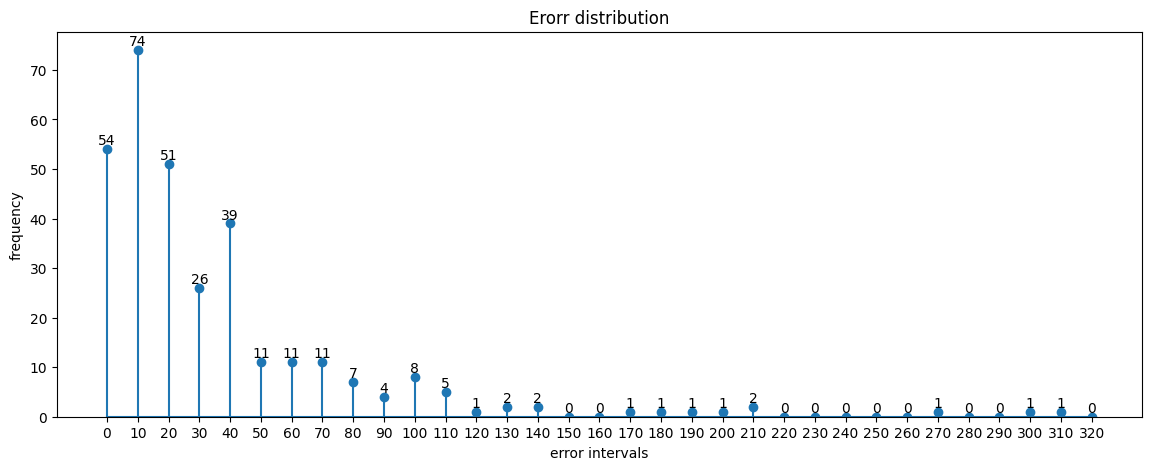

In [18]:
# Plot errors distributions
plt.figure(figsize=(14, 5))
ranged_errors = get_ranged_errors(errors)
x_vals = list(ranged_errors.keys())
y_vals = [val[0] for val in ranged_errors.values()]
bars=plt.bar(x_vals, y_vals, width=0.5)
for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),  # 1 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.xticks(np.array(x_vals))
plt.stem(x_vals, y_vals, basefmt='')
plt.xlabel('error intervals')
plt.ylabel('frequency')
plt.title('Erorr distribution')
plt.show()

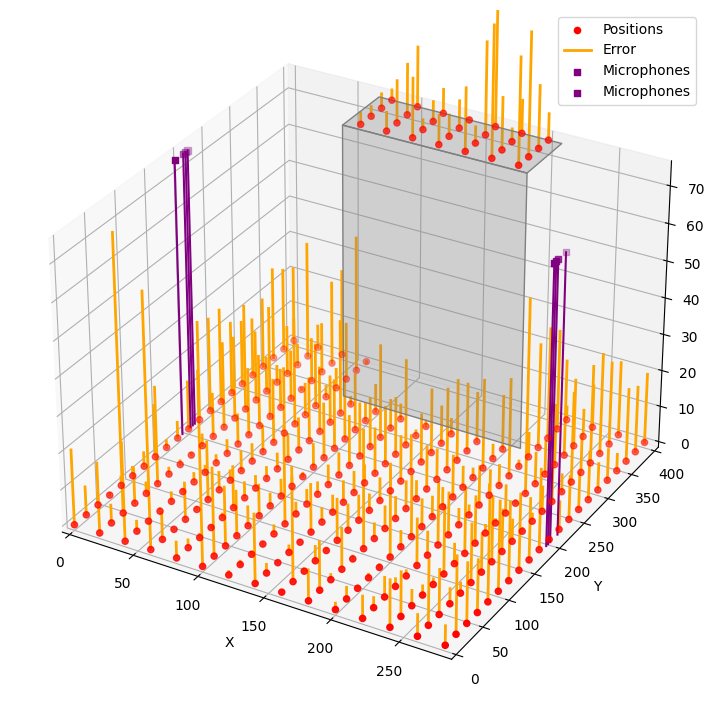

In [ ]:
plot_error_poles(positions, errors_normalized, k1=False)
# plot_error_poles_plotly(positions, errors_normalized, k1=False)

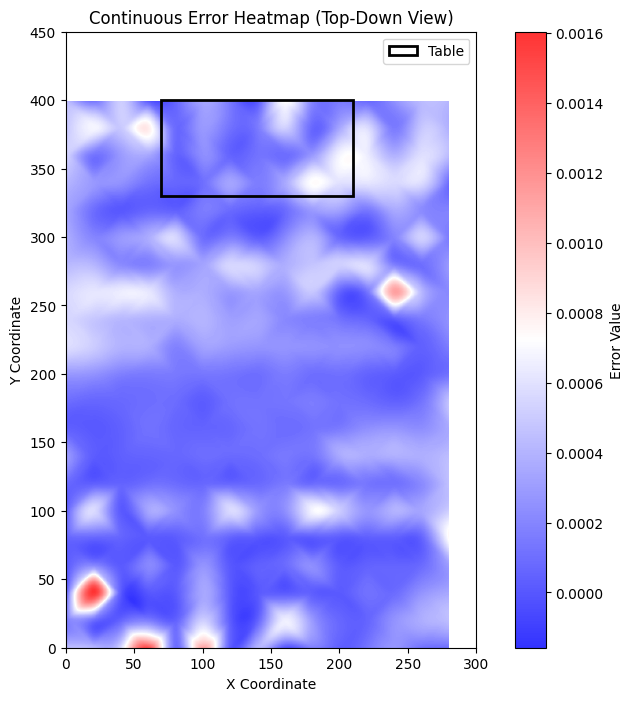

In [ ]:
plot_error_heatmap(positions, errors)

In [ ]:
preds = [val[0] for val in preds_dict.values()]
print(np.mean(errors))

0.0003152602574980509
